# 学习AdaBoost

In [1]:
# 导入必要的包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 使用单一决策树

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 创建决策树分类器
clf = DecisionTreeClassifier()
# 拟合模型
clf.fit(X, y)
score = np.mean(cross_val_score(clf, X, y, cv=10))
score

0.9533333333333334

## 使用单一弱决策树

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 创建决策树分类器
clf = DecisionTreeClassifier(max_depth=1)
# 拟合模型
clf.fit(X, y)
score = np.mean(cross_val_score(clf, X, y, cv=10))
score

0.6666666666666667

## 使用AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# 创建AdaBoost分类器
clf = AdaBoostClassifier(n_estimators=30, learning_rate=0.8)
# 拟合模型
clf.fit(X, y)
score = np.mean(cross_val_score(clf, X, y, cv=10))
score

d:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boos

0.9400000000000001

## 两分类的AdaBoost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

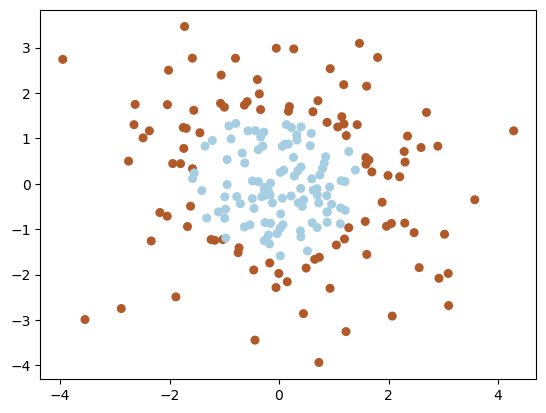

In [2]:
gaussian = make_gaussian_quantiles(cov=2.,
                                   n_samples=200,
                                   n_features=2,
                                   n_classes=2,
                                   random_state=1)
plt.figure()
plt.scatter(gaussian[0][:, 0], gaussian[0][:, 1], c=gaussian[1], s=30, cmap=plt.cm.Paired)

In [8]:
X1, y1 = make_gaussian_quantiles(cov=2.,
                                   n_samples=200,
                                   n_features=2,
                                   n_classes=2,
                                   random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3),
                                      cov=1.5,
                                      n_samples=300,
                                      n_features=2,
                                      n_classes=2,
                                      random_state=1)

In [9]:
X1

array([[ 7.00334571e-01, -2.47067578e-01],
       [-3.95001869e+00,  2.74007953e+00],
       [ 1.50221617e-01, -2.15763780e+00],
       [-1.67205033e+00, -9.41519069e-01],
       [ 2.56048303e+00, -1.84657672e+00],
       [-1.72497907e+00,  3.46393036e+00],
       [ 1.89572778e-01,  1.69996229e+00],
       [-3.34372344e-01,  1.02928372e+00],
       [ 3.09811727e+00, -2.68185934e+00],
       [-1.24066342e+00, -1.22723646e+00],
       [-3.78850955e-01,  7.50035894e-01],
       [ 2.92145879e+00, -2.08053008e+00],
       [-2.67496068e-03, -1.97511955e+00],
       [ 7.48777043e-01,  1.94738919e-01],
       [ 1.60339212e+00, -1.55548115e+00],
       [ 4.95746877e-01, -1.85584900e+00],
       [ 2.06773287e+00, -2.91347893e+00],
       [-1.02614929e+00, -1.22721023e+00],
       [-1.05664139e+00,  2.39349225e+00],
       [-1.55651057e+00,  1.61888380e+00],
       [-1.44516496e+00,  1.12363261e+00],
       [ 8.59137508e-02,  2.98575492e-01],
       [ 1.72281294e-01,  1.59733146e+00],
       [ 3.

In [10]:
y1

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0])

In [11]:
X2

array([[ 2.99768342,  1.2894963 ],
       [ 3.23382276,  5.57227671],
       [ 2.84949083,  1.85392118],
       [ 2.26373629,  3.68104818],
       [ 2.33156589,  2.75647435],
       [ 3.83291205,  2.60832463],
       [ 2.35312436,  1.68588718],
       [ 3.19138335,  2.76702778],
       [ 2.4504104 ,  2.17642271],
       [ 2.68869451,  4.71445169],
       [ 3.45520128,  5.26946386],
       [ 4.56002604,  5.40919778],
       [ 2.24065715,  3.85491115],
       [ 3.16417484,  4.47221053],
       [ 0.94953727,  4.01045105],
       [ 2.43668738,  3.78916885],
       [ 2.14103201,  2.34203886],
       [ 4.42111871,  3.45253431],
       [ 2.83289   ,  2.85418899],
       [ 2.34814911,  4.36942814],
       [ 4.10421861,  3.61542736],
       [ 2.85246163,  1.4897417 ],
       [ 2.64605199,  2.52012507],
       [ 2.02075831,  2.64287101],
       [ 3.51867254,  3.09472185],
       [ 4.0667158 ,  2.37726973],
       [ 1.3182816 ,  3.38598985],
       [ 3.34374311,  2.91045559],
       [ 1.82984781,

In [12]:
y2

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [18]:
# 计算每列的均值
np.mean(X1, axis=0)

array([0.10651152, 0.03691593])

In [20]:
np.mean(X2, axis=0)

array([3.0685033 , 3.09184615])

In [22]:
X = np.concatenate((X1, X2))
X

array([[ 7.00334571e-01, -2.47067578e-01],
       [-3.95001869e+00,  2.74007953e+00],
       [ 1.50221617e-01, -2.15763780e+00],
       [-1.67205033e+00, -9.41519069e-01],
       [ 2.56048303e+00, -1.84657672e+00],
       [-1.72497907e+00,  3.46393036e+00],
       [ 1.89572778e-01,  1.69996229e+00],
       [-3.34372344e-01,  1.02928372e+00],
       [ 3.09811727e+00, -2.68185934e+00],
       [-1.24066342e+00, -1.22723646e+00],
       [-3.78850955e-01,  7.50035894e-01],
       [ 2.92145879e+00, -2.08053008e+00],
       [-2.67496068e-03, -1.97511955e+00],
       [ 7.48777043e-01,  1.94738919e-01],
       [ 1.60339212e+00, -1.55548115e+00],
       [ 4.95746877e-01, -1.85584900e+00],
       [ 2.06773287e+00, -2.91347893e+00],
       [-1.02614929e+00, -1.22721023e+00],
       [-1.05664139e+00,  2.39349225e+00],
       [-1.55651057e+00,  1.61888380e+00],
       [-1.44516496e+00,  1.12363261e+00],
       [ 8.59137508e-02,  2.98575492e-01],
       [ 1.72281294e-01,  1.59733146e+00],
       [ 3.

In [23]:
y = np.concatenate((y1, -y2 + 1))
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

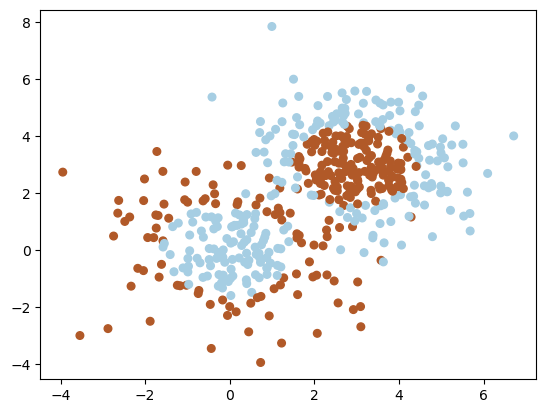

In [24]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


In [37]:
from sklearn.model_selection import cross_val_score

# 创建决策树分类器
clf = DecisionTreeClassifier(max_depth=25, min_samples_split=9)
# 拟合模型
clf.fit(X, y)
score = np.mean(cross_val_score(clf, X, y, cv=10))
score

0.866

In [47]:
# 创建AdaBoost分类器
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

clf.fit(X, y)
score = np.mean(cross_val_score(clf, X, y, cv=10))
score

0.8300000000000001

C:\Users\86151\AppData\Local\Temp\ipykernel_2204\2387367551.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],


Text(0.5, 1.0, 'Decision Boundary')

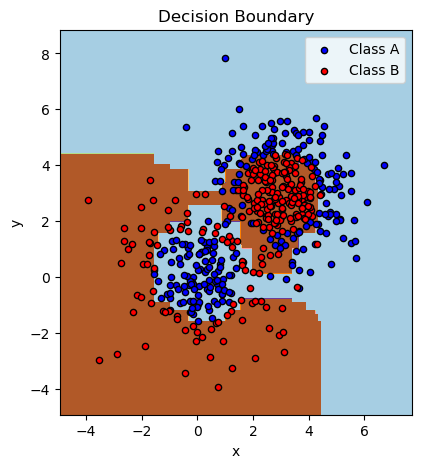

In [50]:
# 绘制决策边界
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
plt.title("Decision Boundary")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

In [55]:
twoclass_output = clf.decision_function(X)
twoclass_output

array([-3.04990766e-01,  7.49934908e-01,  3.83424809e-01,  5.08925135e-01,
        6.80192889e-01,  6.43319664e-01, -1.00338729e-01, -2.72970288e-01,
        6.59824435e-01,  1.06752203e-01, -1.95736362e-01,  6.59824435e-01,
        3.83424809e-01, -2.72970288e-01,  1.97041850e-01,  3.83424809e-01,
        6.80192889e-01,  1.06752203e-01,  1.65004910e-01,  8.57951516e-02,
       -2.40444393e-02, -2.72970288e-01, -1.00338729e-01, -3.04990766e-01,
       -3.04990766e-01, -1.52966776e-01, -1.60094945e-01, -1.02095588e-01,
        2.00209556e-02,  1.36673136e-01, -2.79799727e-02,  1.99185601e-01,
       -1.02095588e-01,  1.83869758e-02, -4.79484652e-02, -9.30800896e-02,
       -1.32010093e-01,  3.71356170e-01, -3.04990766e-01,  3.83424809e-01,
       -3.04990766e-01,  4.60658735e-01,  4.03376648e-01, -3.04990766e-01,
       -2.10178319e-01, -9.01878743e-02,  3.83424809e-01,  4.69674234e-01,
       -2.10178319e-01,  4.03376648e-01, -3.04990766e-01, -2.72970288e-01,
       -1.02095588e-01,  

In [56]:
predicted_class = clf.predict(X)    
predicted_class

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

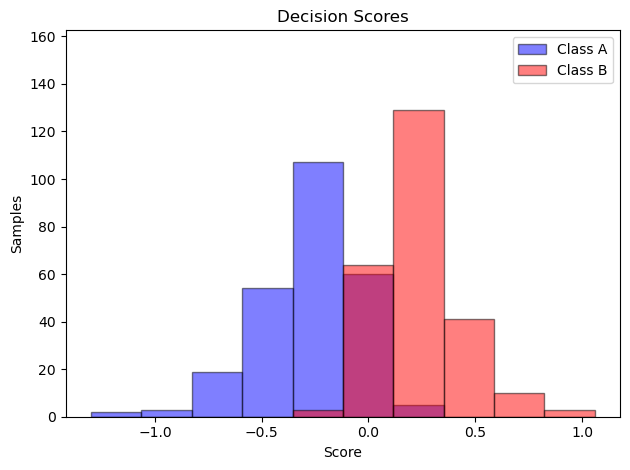

In [52]:
# Plot the two-class decision scores

plot_range = (twoclass_output.min(), twoclass_output.max())
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [53]:
twoclass_output

array([-3.04990766e-01,  7.49934908e-01,  3.83424809e-01,  5.08925135e-01,
        6.80192889e-01,  6.43319664e-01, -1.00338729e-01, -2.72970288e-01,
        6.59824435e-01,  1.06752203e-01, -1.95736362e-01,  6.59824435e-01,
        3.83424809e-01, -2.72970288e-01,  1.97041850e-01,  3.83424809e-01,
        6.80192889e-01,  1.06752203e-01,  1.65004910e-01,  8.57951516e-02,
       -2.40444393e-02, -2.72970288e-01, -1.00338729e-01, -3.04990766e-01,
       -3.04990766e-01, -1.52966776e-01, -1.60094945e-01, -1.02095588e-01,
        2.00209556e-02,  1.36673136e-01, -2.79799727e-02,  1.99185601e-01,
       -1.02095588e-01,  1.83869758e-02, -4.79484652e-02, -9.30800896e-02,
       -1.32010093e-01,  3.71356170e-01, -3.04990766e-01,  3.83424809e-01,
       -3.04990766e-01,  4.60658735e-01,  4.03376648e-01, -3.04990766e-01,
       -2.10178319e-01, -9.01878743e-02,  3.83424809e-01,  4.69674234e-01,
       -2.10178319e-01,  4.03376648e-01, -3.04990766e-01, -2.72970288e-01,
       -1.02095588e-01,  

## 多类Adaboost决策树

In [57]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

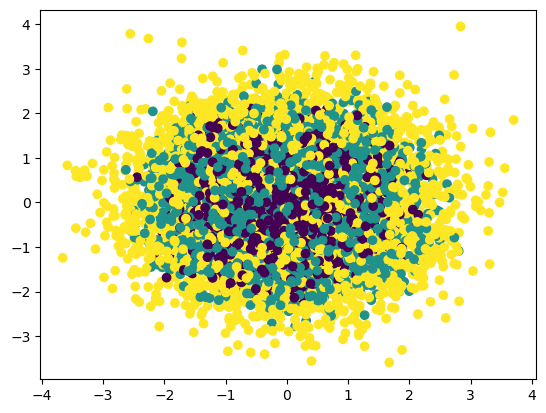

In [61]:
X, y = make_gaussian_quantiles(n_samples=13000, n_features=10,
                               n_classes=3, random_state=1)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [66]:
# 分割数据集
n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

In [67]:
# 创建AdaBoost分类器
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [68]:
# 拟合模型
bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

d:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=600)

In [69]:
# 记录testerror，即错误率
real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

In [70]:
n_trees_discrete

600

In [71]:
n_trees_real

600

In [72]:
len(real_test_errors)

600

In [73]:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

In [74]:
discrete_estimator_errors

array([0.58266667, 0.55146353, 0.57021198, 0.5594519 , 0.54452266,
       0.53886454, 0.54915591, 0.56953304, 0.56127774, 0.54029427,
       0.51997593, 0.54699037, 0.57775068, 0.5781084 , 0.55752785,
       0.54175391, 0.57370501, 0.55766442, 0.54592374, 0.55024974,
       0.56060831, 0.56735702, 0.55415956, 0.55530733, 0.53463952,
       0.53493181, 0.56386509, 0.57803799, 0.54432339, 0.56458691,
       0.53646773, 0.58265625, 0.56927332, 0.54092071, 0.56937494,
       0.57676791, 0.56910972, 0.56324518, 0.56233236, 0.55746428,
       0.59222893, 0.54502927, 0.60547576, 0.58870729, 0.55427761,
       0.58246449, 0.58109928, 0.54865504, 0.58580028, 0.58412284,
       0.56130018, 0.59359626, 0.5629434 , 0.56492155, 0.56098912,
       0.5888498 , 0.56340217, 0.56417233, 0.55596552, 0.59008036,
       0.56845893, 0.57554693, 0.56096646, 0.59810992, 0.55849854,
       0.57087188, 0.58753656, 0.57387422, 0.58039658, 0.56845942,
       0.58576998, 0.58371578, 0.57952676, 0.56822627, 0.60765

Text(0.5, 0, 'Number of Trees')

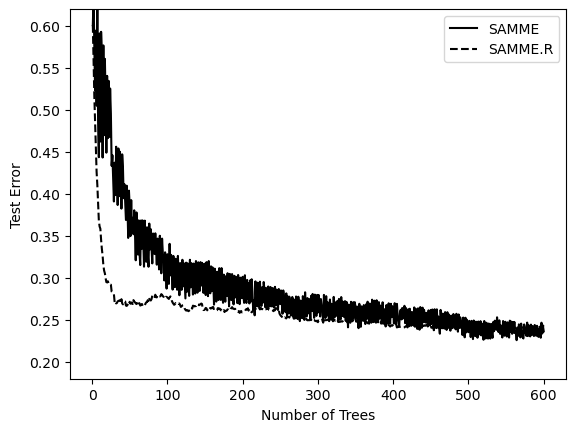

In [75]:
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')


(-20.0, 620.0)

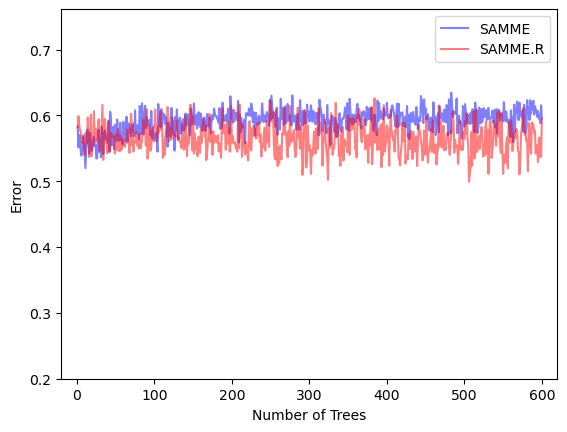

In [76]:
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

(-20.0, 620.0)

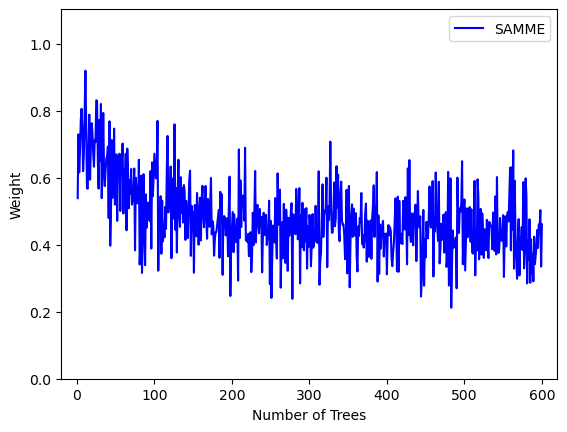

In [77]:
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

In [78]:
discrete_estimator_weights

array([0.53912576, 0.7298422 , 0.61564665, 0.68131391, 0.77187539,
       0.80606217, 0.74382955, 0.61980144, 0.67019683, 0.79742972,
       0.91980137, 0.75694403, 0.56940106, 0.5672013 , 0.69301835,
       0.7886125 , 0.59424509, 0.69218793, 0.76339955, 0.73720109,
       0.67427396, 0.63310692, 0.7134835 , 0.70651331, 0.83155019,
       0.8297879 , 0.65442566, 0.56763434, 0.7730805 , 0.65002209,
       0.82052514, 0.53919   , 0.62139034, 0.79364612, 0.62076869,
       0.57544192, 0.62239116, 0.65820622, 0.66377089, 0.69340489,
       0.47993974, 0.76881116, 0.39721987, 0.50178483, 0.71276676,
       0.5403728 , 0.54878925, 0.74686381, 0.51977481, 0.53013873,
       0.67006012, 0.47144235, 0.66004622, 0.64797998, 0.67195481,
       0.50090192, 0.6572489 , 0.65255149, 0.70251468, 0.49327438,
       0.6263712 , 0.58294179, 0.67209282, 0.44332688, 0.68711477,
       0.61160682, 0.50903443, 0.59320722, 0.55311834, 0.62636819,
       0.5199621 , 0.53265186, 0.55847427, 0.62779374, 0.38349

## AdaBoost决策树回归

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [80]:
# 生成数据
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [81]:
# 拟合模型
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x21625426F40)

In [83]:
# 预测数据
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

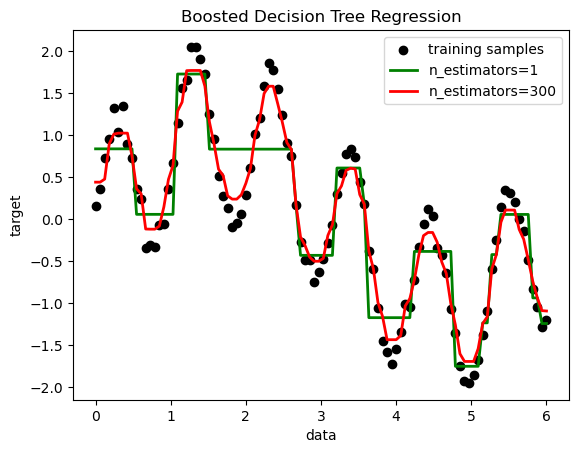

In [84]:
# 绘制结果
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()